In [2]:
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [3]:
data_file = 'AirQualityDataHourly2015-2017.csv'
data = pd.read_csv(data_file, parse_dates=[['Date', 'Time']]) 

In [4]:
data = data.drop('Status', 1)


In [5]:
data = data.rename(columns={'Nitrogen oxides as nitrogen dioxide': 'y', 'Date_Time': 'ds'})

In [6]:
print(data)

                        ds         y
0      01/01/2015 01:00:00  43.52978
1      01/01/2015 02:00:00  24.40414
2      01/01/2015 03:00:00  21.53523
3      01/01/2015 04:00:00  24.93852
4      01/01/2015 05:00:00  16.52639
5      01/01/2015 06:00:00   16.6727
6      01/01/2015 07:00:00  12.83096
7      01/01/2015 08:00:00  18.08317
8      01/01/2015 09:00:00  17.11018
9      01/01/2015 10:00:00   11.3722
10     01/01/2015 11:00:00   9.42719
11     01/01/2015 12:00:00  10.05927
12     01/01/2015 13:00:00  10.54553
13     01/01/2015 14:00:00  10.54553
14     01/01/2015 15:00:00  11.17761
15     01/01/2015 16:00:00   9.23212
16     01/01/2015 17:00:00  10.10852
17     01/01/2015 18:00:00   9.42719
18     01/01/2015 19:00:00   8.45516
19     01/01/2015 20:00:00   8.16303
20     01/01/2015 21:00:00   7.28758
21     01/01/2015 22:00:00   7.23929
22     01/01/2015 23:00:00   5.29476
23     01/01/2015 24:00:00   4.95385
24     02/01/2015 01:00:00   4.19794
25     02/01/2015 02:00:00  10.75208
2

In [7]:
data.y = pd.to_numeric(data.y, errors='coerce')

In [8]:
data['y'] = np.log(data['y'])
data.head()

,ds,y
0,01/01/2015 01:00:00,3.773445
1,01/01/2015 02:00:00,3.194753
2,01/01/2015 03:00:00,3.069690
3,01/01/2015 04:00:00,3.216414
4,01/01/2015 05:00:00,2.804958


In [9]:
data = data[~data['ds'].str.contains('24:00:00')]

In [10]:
m = Prophet()
m.fit(data);

In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
23843,2018-12-06 23:00:00
23844,2018-12-07 23:00:00
23845,2018-12-08 23:00:00
23846,2018-12-09 23:00:00
23847,2018-12-10 23:00:00


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
23843,2018-12-06 23:00:00,2.583369,0.790880,4.157510
23844,2018-12-07 23:00:00,2.562053,0.868595,4.117392
23845,2018-12-08 23:00:00,2.466311,0.724052,4.021185
23846,2018-12-09 23:00:00,2.460666,0.745228,4.156048
23847,2018-12-10 23:00:00,2.581744,0.870926,4.188273


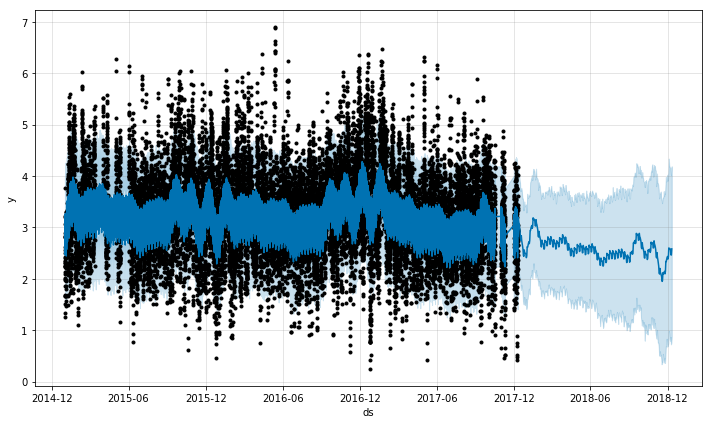

In [13]:
m.plot(forecast)

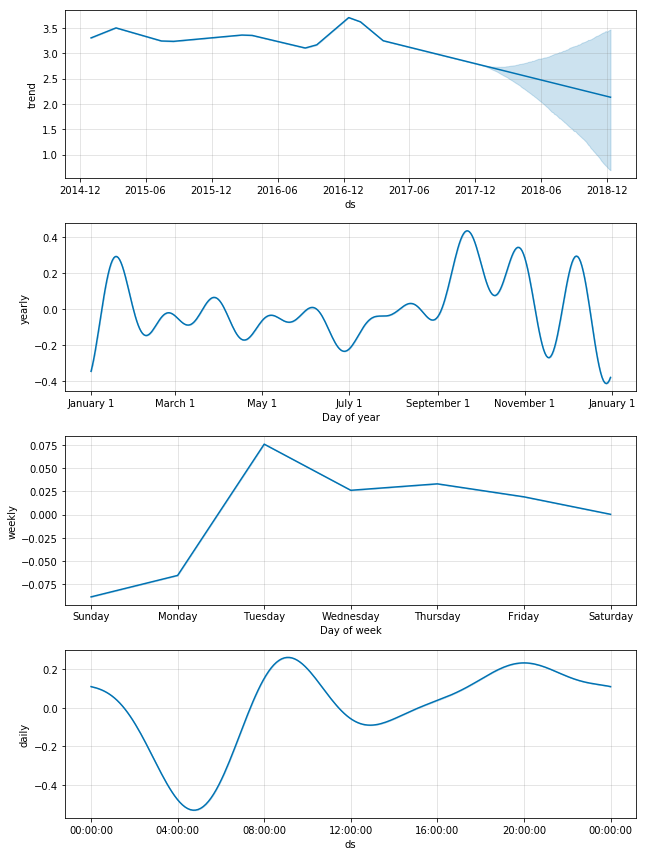

In [14]:
m.plot_components(forecast)